In [7]:
import pandas as pd
import numpy as np
import librosa
import os
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
import tqdm
metadata = pd.read_csv('TinySOL_metadata (1).csv')
metadata.head()

,Path,Fold,Family,Instrument (abbr.),Instrument (in full),Technique (abbr.),Technique (in full),Pitch,Pitch ID,Dynamics,Dynamics ID,Instance ID,String ID (if applicable),Needed digital retuning
0,Brass/Bass_Tuba/ordinario/BTb-ord-F#1-pp-N-N.wav,2,Brass,BTb,Bass Tuba,ord,ordinario,F#1,30,pp,0,0,NaN,False
1,Brass/Bass_Tuba/ordinario/BTb-ord-G1-pp-N-R100...,4,Brass,BTb,Bass Tuba,ord,ordinario,G1,31,pp,0,0,NaN,True
2,Brass/Bass_Tuba/ordinario/BTb-ord-G#1-pp-N-T16...,3,Brass,BTb,Bass Tuba,ord,ordinario,G#1,32,pp,0,0,NaN,True
3,Brass/Bass_Tuba/ordinario/BTb-ord-A1-pp-N-T23d...,2,Brass,BTb,Bass Tuba,ord,ordinario,A1,33,pp,0,0,NaN,True
4,Brass/Bass_Tuba/ordinario/BTb-ord-A#1-pp-N-N.wav,0,Brass,BTb,Bass Tuba,ord,ordinario,A#1,34,pp,0,0,NaN,False


In [23]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file, res_type='scipy') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [29]:
from tqdm import tqdm
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = str(row["Path"])
    final_class_labels=row["Instrument (in full)"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

2913it [04:35, 10.58it/s]


In [30]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-796.161, 154.30495, 115.17337, 69.384094, 33...",Bass Tuba
1,"[-780.7726, 155.0216, 114.37417, 66.248245, 28...",Bass Tuba
2,"[-737.51624, 197.43735, 118.784454, 46.450912,...",Bass Tuba
3,"[-779.69147, 155.60567, 113.64972, 64.04005, 2...",Bass Tuba
4,"[-745.1969, 203.65991, 119.42016, 43.040768, 4...",Bass Tuba


In [31]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [32]:
### Label Encoding
###y=np.array(pd.get_dummies(y))
### Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [33]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [40]:
# Reshape X to match the input shape expected by Conv2D
X = X.reshape(X.shape[0], 40, 1, 1)  # (number_of_samples, height, width, channels)

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [69]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense
model = Sequential([
    Conv1D(32, 3, activation='relu', input_shape=(40, 1)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(y.shape[1],activation='softmax'),
])

In [70]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [71]:
model.fit(X_train, y_train, batch_size=32, epochs=30)


Epoch 1/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3744 - loss: 7.9363  
Epoch 2/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8922 - loss: 0.3184
Epoch 3/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9614 - loss: 0.1335
Epoch 4/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9710 - loss: 0.0917
Epoch 5/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9803 - loss: 0.0655
Epoch 6/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9812 - loss: 0.0535
Epoch 7/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9863 - loss: 0.0454
Epoch 8/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9830 - loss: 0.0579
Epoch 9/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9823 - loss: 0.0568
Epoch 10/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9802 - loss: 0.0662
Epoch 11/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9947 - loss: 0.0219
Epoch 12/30
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9925 - 

In [9]:
import os
import pandas as pd
import librosa
import numpy as np
import IPython.display as ipd
import matplotlib.pyplot as plt

class AudioDataset:
    def __init__(self, metadata_path, sample_rate=22050, n_mels=128):
        self.metadata = pd.read_csv(metadata_path)
        self.sample_rate = sample_rate
        self.n_mels = n_mels

    def __len__(self):
        return len(self.metadata)
    
    def __getitem__(self, idx):
        # Get file path and ground truth
        audio_file_path = self.metadata.iloc[idx]['Path']
        ground_truth = self.metadata.iloc[idx]['Instrument (in full)']
        
        # Load the audio file
        audio, sr = librosa.load(audio_file_path, sr=self.sample_rate)
        
        # Ensure audio is 1-dimensional
        audio = np.expand_dims(audio, axis=0)
        
        # Compute the mel spectrogram
        mel_spectrogram = librosa.feature.melspectrogram(y=audio[0], sr=sr, n_mels=self.n_mels)
        
        # Convert to log scale (dB)
        mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)
        
        # Expand dimensions to match required shape [1, F, T]
        mel_spectrogram = np.expand_dims(mel_spectrogram, axis=0)

        # Plot the mel spectrogram
        plt.figure(figsize=(10, 4))
        plt.imshow(mel_spectrogram[0], aspect='auto', origin='lower')
        plt.title('Mel Spectrogram')
        plt.xlabel('Time Frames')
        plt.ylabel('Mel Bands')
        plt.colorbar(format='%+2.0f dB')
        plt.show()
        
        # Create the output dictionary
        data = {
            'file': os.path.basename(audio_file_path),
            'audio': audio,
            'mel': mel_spectrogram,
            'gt': ground_truth
        }
        
        return data


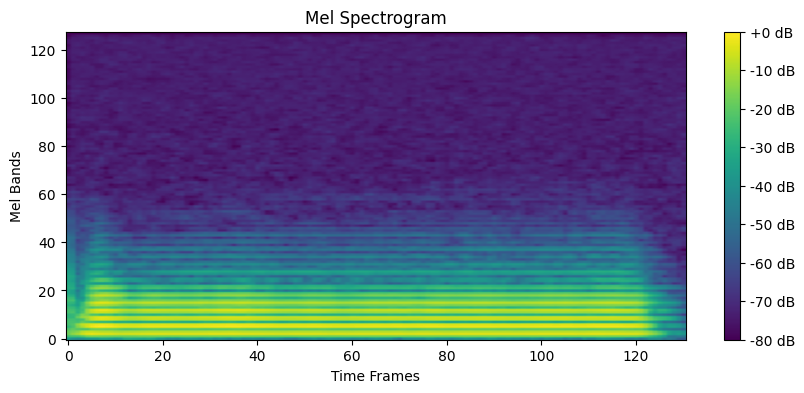

BTb-ord-E2-pp-N-T25u.wav
(1, 66977)
(1, 128, 131)
Bass Tuba


In [12]:
# Create an instance of the dataset
dataset = AudioDataset('TinySOL_metadata (1).csv')

# Get data for a specific index
data = dataset[10]

print(data['file'])          # Filename of the audio file
print(data['audio'].shape)   # Shape of the audio array
print(data['mel'].shape)     # Shape of the mel spectrogram array
print(data['gt'])            # Ground truth label
